In [2]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })
     

# Exe 1

In [3]:
x4 = np.linspace(-4,4,400)
pdf4 = stats.norm.pdf(x4)

# normalize by dx
pdf4N = pdf4*(x4[1]-x4[0])

# print sums
print(f'Sum over pdf: {np.sum(pdf4):.3f}')
print(f'Sum over normalized pdf: {np.sum(pdf4N):.3f}')

Sum over pdf: 49.872
Sum over normalized pdf: 1.000


# Exe 2

In [4]:
# with a restricted range
x2 = np.linspace(-2,2,300)
pdf2 = stats.norm.pdf(x2)

# normalize by dx
pdf2N = pdf2*(x2[1]-x2[0])

# normalize to sum=1 ("U" is for "unit")
pdf2U = pdf2 / np.sum(pdf2)

# print sums
print(f'Sum over pdf normalized by dx : {np.sum(pdf2N):.3f}')
print(f'Sum over pdf normalized by sum: {np.sum(pdf2U):.3f}')

Sum over pdf normalized by dx : 0.955
Sum over pdf normalized by sum: 1.000


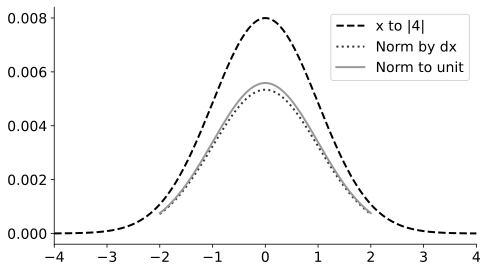

In [5]:
# plot
plt.figure(figsize=(7,4))
plt.plot(x4,pdf4N,'k--',linewidth=2,label='x to |4|')
plt.plot(x2,pdf2N,':',color=(.2,.2,.2,),linewidth=2,label='Norm by dx')
plt.plot(x2,pdf2U,color=(.6,.6,.6),linewidth=2,label='Norm to unit')
plt.xlim(x4[[0,-1]])
plt.legend()

# display
plt.tight_layout()
plt.show()
     


In [6]:
print(f'Sum over normalized pdf: {np.sum(pdf4N):.9f}')

Sum over normalized pdf: 0.999939305


# Exe 3

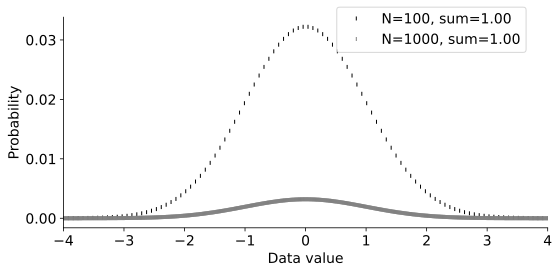

In [7]:
npnts = [100,1000]
colors = ['k','gray']


plt.figure(figsize=(8,4))

# the loop that does it all
for resolution,linecolor in zip(npnts,colors):

  # create x-axis grid
  x = np.linspace(-4,4,resolution)

  # evaluate "raw" pdf
  pdf = stats.norm.pdf(x)

  # normalize by dx
  pdfN = pdf*(x[1]-x[0])

  # plot the normalized pdf
  plt.plot(x,pdfN,'|',linewidth=2,color=linecolor,markersize=4,
           label=f'N={resolution}, sum={np.sum(pdfN):.2f}')


plt.xlim(x[[0,-1]])
plt.legend(bbox_to_anchor=[.55,.8])
plt.xlabel('Data value')
plt.ylabel('Probability')

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 4

In [8]:
# create cdf from pdf
x = np.linspace(-4,4,300)
pdf = stats.norm.pdf(x)

# python's cdf
cdf_sp = stats.norm.cdf(x)

# manual computation
cdf_my = np.cumsum(pdf)

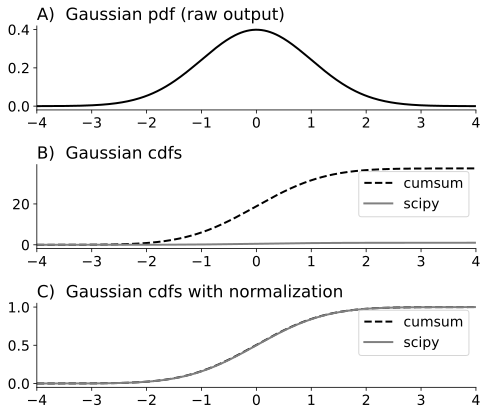

In [9]:
# plot
_,axs = plt.subplots(3,1,figsize=(7,6))

axs[0].plot(x,pdf,'k',linewidth=2)
axs[0].set(xlim=x[[0,-1]])
axs[0].set_title(r'A)  Gaussian pdf (raw output)')


axs[1].plot(x,cdf_my,'k--',linewidth=2,label='cumsum')
axs[1].plot(x,cdf_sp,color='gray',linewidth=2,label='scipy')
axs[1].set(xlim=x[[0,-1]])
axs[1].set_title(r"B)  Gaussian cdfs")
axs[1].legend()


# normalized by dx
cdf_myN = np.cumsum(pdf) * (x[1]-x[0])

axs[2].plot(x,cdf_myN,'k--',linewidth=2,label='cumsum')
axs[2].plot(x,cdf_sp,color='gray',linewidth=2,label='scipy')
axs[2].set(xlim=x[[0,-1]])
axs[2].set_title(r"C)  Gaussian cdfs with normalization")
axs[2].legend()


# display the figure
plt.tight_layout()
plt.show()